# EDA Incident Management

##  Incident Management

In ITIL terminology, an ‘incident’ is defined as:<br/> 

An unplanned interruption to an IT service or reduction in the quality of an IT 
service. Failure of a configuration item that has not yet impacted service is also 
an incident, for example failure of one disk from a mirror set.<br/>

Incident Management is the process for dealing with all incidents; this can 
include failures, questions or queries reported by the users (usually via a 
telephone call to the Service Desk), by technical staff, or automatically detected 
and reported by event monitoring tools.

###  Purpose/goal/objective
The primary goal of the Incident Management process is to restore normal 
service operation as quickly as possible and minimize the adverse impact on 
business operations, thus ensuring that the best possible levels of service quality 
and availability are maintained. ‘Normal service operation’ is defined here as 
service operation within SLA limits.

### Value to business 

The value of Incident Management includes:<br/>
- The ability to detect and resolve incidents which results in lower downtime to the business, which in turn means higher availability of the service. This means that the business is able to exploit the functionality of the service as designed. 
- The ability to align IT activity to real-time business priorities. This is because Incident Management includes the capability to identify business priorities and dynamically allocate resources as necessary. 
- The ability to identify potential improvements to services. This happens as a result of understanding what constitutes an incident and also from being in contact with the activities of business operational staff. 
- The Service Desk can, during its handling of incidents, identify additional service or training requirements found in IT or the business.

Incident Management is highly visible to the business, and it is therefore easier to 
demonstrate its value than most areas in Service Operation. For this reason, 
Incident Management is often one of the first processes to be implemented in 
Service Management projects. The added benefit of doing this is that Incident 
Management can be used to highlight other areas that need attention – thereby 
providing a justification for expenditure on implementing other processes

### Metrics 
The metrics that should be monitored and reported upon to judge the efficiency
and effectiveness of the Incident Management process, and its operation, will 
include: 
- Total numbers of Incidents (as a control measure) 
- Breakdown of incidents at each stage (e.g. logged, work in progress, closed etc) 
- Size of current incident backlog 
- Number and percentage of major incidents 
- Mean elapsed time to achieve incident resolution or circumvention, broken down by impact code 
- Percentage of incidents handled within agreed response time (incident response-time targets may be specified in SLAs, for example, by impact and urgency codes) 
- Average cost per incident 
- Number of incidents reopened and as a percentage of the total 
- Number and percentage of incidents incorrectly assigned 
- Number and percentage of incidents incorrectly categorized 
- Percentage of Incidents closed by the Service Desk without reference to other levels of support (often referred to as ‘first point of contact’) 
- Number and percentage the of incidents processed per Service Desk agent 
- Number and percentage of incidents resolved remotely, without the need for a visit 
- Number of incidents handled by each Incident Model 
- Breakdown of incidents by time of day, to help pinpoint peaks and ensure matching of resources.

## Data preparation

In [1]:
#Importing Packages

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns

In [2]:
#Import Dataset

df = pd.read_csv('incident_event_log.csv')

In [3]:
#Check Dataset

df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [5]:
# number of missing values per column
df.isna().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

In [6]:
# number of duplicated data
df.duplicated().sum()

0

#### The total number of problems recorded in the period (as a control measure) 

In [7]:
df.nunique()

number                     24918
incident_state                 9
active                         2
reassignment_count            28
reopen_count                   9
sys_mod_count                115
made_sla                       2
caller_id                   5245
opened_by                    208
opened_at                  19849
sys_created_by               186
sys_created_at             11553
sys_updated_by               846
sys_updated_at             50664
contact_type                   5
location                     225
category                      59
subcategory                  255
u_symptom                    526
cmdb_ci                       51
impact                         3
urgency                        3
priority                       4
assignment_group              79
assigned_to                  235
knowledge                      2
u_priority_confirmation        2
notify                         2
problem_id                   253
rfc                          182
vendor    

based on "number" we have 24918 of problems recorded in the period

#### Breakdown of incidents at each stage

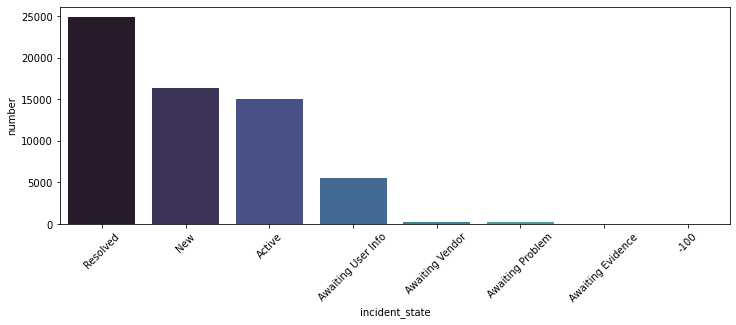

In [8]:
df_incident_state = df.groupby(["incident_state"])["number"].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,4))
df_incident_state.drop([0],inplace=True)
sns.barplot(data=df_incident_state, x="incident_state", y="number", palette = "mako");
plt.xticks(rotation=45)
plt.show()


In [9]:
df_incident_state

,incident_state,number
1,Resolved,24905
2,New,16397
3,Active,15013
4,Awaiting User Info,5471
5,Awaiting Vendor,259
6,Awaiting Problem,247
7,Awaiting Evidence,21
8,-100,2


#### Number and percentage of major incidents

In [10]:
df_impact = df.groupby(["impact"])["number"].count().reset_index()
df_impact

,impact,number
0,1 - High,3491
1,2 - Medium,134335
2,3 - Low,3886


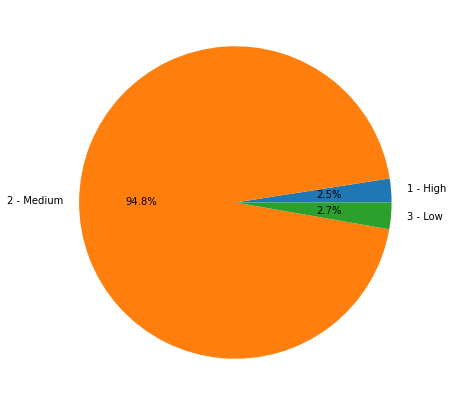

In [11]:
fig = plt.figure(figsize =(7, 13))

# Matplotlib
impact = df_impact["impact"].tolist()
number = df_impact["number"].tolist()

# Pie Chart
plt.pie(number, 
        labels = impact, 
        autopct='%.1f%%')

# Show Plot
plt.show() 

#### Mean elapsed time to achieve incident resolution or circumvention

In [12]:
#change data type

df['opened_at'] = pd.to_datetime(df['opened_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])

In [13]:
df['range_time'] = df['closed_at'] - df['opened_at']
df[["opened_at", "closed_at", "range_time"]].head()

,opened_at,closed_at,range_time
0,2016-02-29 01:16:00,2016-05-03 12:00:00,64 days 10:44:00
1,2016-02-29 01:16:00,2016-05-03 12:00:00,64 days 10:44:00
2,2016-02-29 01:16:00,2016-05-03 12:00:00,64 days 10:44:00
3,2016-02-29 01:16:00,2016-05-03 12:00:00,64 days 10:44:00
4,2016-02-29 04:40:00,2016-06-03 10:00:00,95 days 05:20:00


### Source
Data Set: Incident management process enriched event log Data Set by UCI Machine Learning Library.<br/>
https://archive.ics.uci.edu/ml/datasets/Incident+management+process+enriched+event+log#

### Reference
Commerce, Office of Government. (2007). The Official Introduction to the ITIL Service Lifecycle. United Kingdom : Office of Government Commerce.